<center><h1>Taller sumativo : Aequitas</h1></center>
<center><h2>IMT2240: Ciencia de datos responsable</h2></center>
<center><h3>25 de abril, 2023</h3></center>

## Instrucciones generales

- **Las respuestas a las preguntas siguientes deben condecirse una con la otra**

- Es probable que te apoyes de código de internet o Chat-GPT. Si es así, indícalo.

- Fecha de entrega: Habrán dos entregas, la primera para evaluar el avance en clases (plazo max. 25 de abril, 15:20 hrs) y una entrega final. La nota final es:

$$N_F = N_c \times 0.1 + N_f \times 0.9$$

Para la nota de entrega en clases, se considerará puntaje total de la pregunta a pesar de que no se encuentre completamente desarrollada. Es decir, se evaluará **avance**.

Para las preguntas que siguen a continuación, asuma que los datos entregados se encuentran limpios y listos para ser trabajados.

In [339]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [340]:
def overview(data):
    display(data.head())
    display(data.shape)
    data.info(verbose=True)

In [341]:
fraud = pd.read_csv('fraud.csv')
overview(fraud)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,0,0.9,0.892308,-1,109,40,0.004396,-0.652043,AC,76,...,-1,1,1000.0,0,INTERNET,0.884383,windows,0,1,3
1,0,0.6,0.228484,-1,205,30,30.558006,49.533561,AA,1590,...,20,0,200.0,0,INTERNET,1.700269,windows,1,1,2
2,0,0.9,0.468251,83,137,30,0.016683,-0.948282,AC,2407,...,15,0,1000.0,0,INTERNET,13.176975,other,1,1,0
3,0,0.5,0.606213,32,8,30,0.004450,-0.931230,AC,2795,...,-1,0,200.0,0,INTERNET,35.560749,linux,1,1,2
4,0,0.8,0.597179,-1,243,50,0.011395,-0.705975,AC,1064,...,-1,1,200.0,0,INTERNET,7.718273,linux,0,1,4


(100000, 31)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fraud_bool                        100000 non-null  int64  
 1   income                            100000 non-null  float64
 2   name_email_similarity             100000 non-null  float64
 3   prev_address_months_count         100000 non-null  int64  
 4   current_address_months_count      100000 non-null  int64  
 5   customer_age                      100000 non-null  int64  
 6   days_since_request                100000 non-null  float64
 7   intended_balcon_amount            100000 non-null  float64
 8   payment_type                      100000 non-null  object 
 9   zip_count_4w                      100000 non-null  int64  
 10  velocity_6h                       100000 non-null  float64
 11  velocity_24h                      100000 non-null  fl

### 1. Revise la distribución de la variable objetivo (frecuencias). Apóyese de visualizaciones adecuadas. En base a esto, responda: ¿Por qué el accuracy no es una métrica adecuada para evaluar el desempeño del modelo? Proponga cómo evaluar el desempeño del modelo. (1 pto.)

In [342]:
ones = fraud[fraud['fraud_bool'] == 1]
len(ones)

1067

In [343]:
ceros = fraud[fraud['fraud_bool'] == 0]
len(ceros)

98933

<AxesSubplot:xlabel='fraud_bool', ylabel='count'>

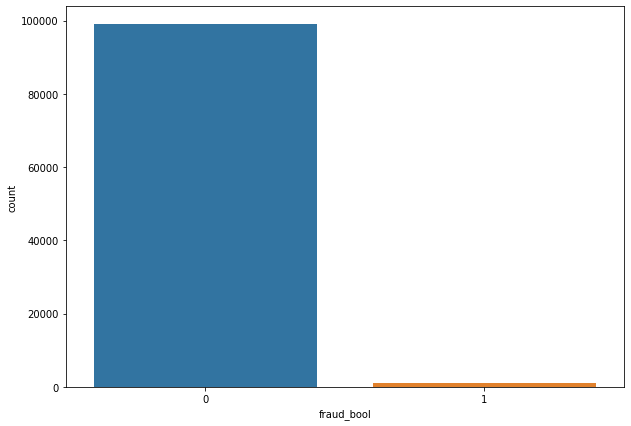

In [344]:
fig, ax = plt.subplots(1, figsize=(10, 7))
sns.countplot(data=fraud, x = 'fraud_bool', ax=ax)

Vemos que existe una gran diferencia entre la frecuencia de los True Negative y los True Positive. El acurracy no será una métrica adecuada para evaluar el desempeño de un modelo, ya que el acurracy debende directamente de tanto los TP y los TN, y como están en una desproporción tan singinifcativa el acurrracy no sería tan representativo. Una buena métrica para evaluar el desempeño sería la precisión, ya que debende sólo de los TP y los FP y no de los datos negativos, por lo que sería más representativo.

### 2. Dado el contexto en el que se está trabajando, ¿qué métrica(s) grupales es (son) particularmente relevantes? Justifique su respuesta (1 pto.)

Una métrica grupal que es relevante para un modelo es el Total Predicted Positive, donde vé la cantidad de positivos predichos totales, como tenemos datos de entrenamiento con tan pocos datos positivos entonces es importante ver que cuántos datos positivos puede predecir nuestro modelo.

Otra métrica grupal que es relevante para un modelo es Predicted Prevalence, donde se vé la razón de entidades positivas dentro de un grupo que se predijo como positivo, al igual que en la primera métrica grupal, tenemos muy pocos datos positivos así que es importante ver cuántos de estos datos están bien predichos.

### 3. Realice el tratamiento de datos necesarios para poder entrenar y testear un modelo de clasificación (1 pto.) 

In [345]:
fraud_num = fraud.select_dtypes(include=[int, float]).columns
fraud_cat = fraud.select_dtypes(exclude=[int, float]).columns

In [346]:
fraud_num = fraud_num.drop('fraud_bool')
fraud[fraud_cat] = fraud[fraud_cat].astype('category')
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                            Non-Null Count   Dtype   
---  ------                            --------------   -----   
 0   fraud_bool                        100000 non-null  int64   
 1   income                            100000 non-null  float64 
 2   name_email_similarity             100000 non-null  float64 
 3   prev_address_months_count         100000 non-null  int64   
 4   current_address_months_count      100000 non-null  int64   
 5   customer_age                      100000 non-null  int64   
 6   days_since_request                100000 non-null  float64 
 7   intended_balcon_amount            100000 non-null  float64 
 8   payment_type                      100000 non-null  category
 9   zip_count_4w                      100000 non-null  int64   
 10  velocity_6h                       100000 non-null  float64 
 11  velocity_24h                      100000

In [347]:
for cat in fraud_cat:
    print(fraud[fraud_cat][cat].unique(), "\n")

['AC', 'AA', 'AB', 'AD', 'AE']
Categories (5, object): ['AA', 'AB', 'AC', 'AD', 'AE'] 

['CA', 'CB', 'CF', 'CE', 'CC', 'CD', 'CG']
Categories (7, object): ['CA', 'CB', 'CC', 'CD', 'CE', 'CF', 'CG'] 

['BA', 'BC', 'BB', 'BE', 'BD', 'BG', 'BF']
Categories (7, object): ['BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG'] 

['INTERNET', 'TELEAPP']
Categories (2, object): ['INTERNET', 'TELEAPP'] 

['windows', 'other', 'linux', 'macintosh', 'x11']
Categories (5, object): ['linux', 'macintosh', 'other', 'windows', 'x11'] 



Vemos que las columnas "source" y "device_os" no presentan un orden como las demás columnas categóricas, por lo que para codificarlas a datos numéricos usaremos la función OneHotEncoder() de sklearn.preprocessing. Para las demás columnas categóricas usaré la función OrdinalEncoder() de la misma librería.

In [348]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [349]:
h_encoder = make_column_transformer((OneHotEncoder(handle_unknown='ignore'), ['source']), (OneHotEncoder(handle_unknown='ignore'),['device_os']))
cat_cod = h_encoder.fit_transform(fraud[['source','device_os']])
columns1 = np.concatenate(h_encoder.transformers_[0][1].categories_ + h_encoder.transformers_[1][1].categories_)
new_columns = pd.DataFrame(cat_cod.toarray(), columns=columns1)
new_columns

,INTERNET,TELEAPP,linux,macintosh,other,windows,x11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
99995,1.0,0.0,0.0,0.0,1.0,0.0,0.0
99996,1.0,0.0,1.0,0.0,0.0,0.0,0.0
99997,1.0,0.0,1.0,0.0,0.0,0.0,0.0
99998,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [350]:
fraud_cat = fraud_cat.drop(['source','device_os'])
fraud_cat

Index(['payment_type', 'employment_status', 'housing_status'], dtype='object')

In [351]:
o_encoder = OrdinalEncoder(categories= [fraud[i].cat.categories for i in fraud_cat])
cat2_cod = o_encoder.fit_transform(fraud[fraud_cat])
new_columns1 = pd.DataFrame(cat2_cod, columns=['payment_type1', 'employment_status1', 'housing_status1'])
new_columns1

,payment_type1,employment_status1,housing_status1
0,2.0,0.0,0.0
1,0.0,1.0,0.0
2,2.0,0.0,2.0
3,2.0,0.0,1.0
4,2.0,0.0,1.0
...,...,...,...
99995,2.0,0.0,2.0
99996,0.0,2.0,1.0
99997,1.0,0.0,2.0
99998,0.0,1.0,2.0


In [352]:
new_columns = pd.concat([new_columns, new_columns1], axis=1)
new_columns

,INTERNET,TELEAPP,linux,macintosh,other,windows,x11,payment_type1,employment_status1,housing_status1
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
99995,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0
99996,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
99997,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
99998,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0


In [353]:
fraud = pd.concat([fraud, new_columns], axis=1)
fraud.drop(fraud.select_dtypes(exclude=[int, float]).columns, axis=1, inplace=True)
fraud.rename({'payment_type1': 'payment_type', 'employment_status1':'employment_status', 'housing_status1':'housing_status'},axis=1, inplace=True)
fraud

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,INTERNET,TELEAPP,linux,macintosh,other,windows,x11,payment_type,employment_status,housing_status
0,0,0.9,0.892308,-1,109,40,0.004396,-0.652043,76,6021.222697,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
1,0,0.6,0.228484,-1,205,30,30.558006,49.533561,1590,8518.579788,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,0.9,0.468251,83,137,30,0.016683,-0.948282,2407,3242.922333,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0
3,0,0.5,0.606213,32,8,30,0.004450,-0.931230,2795,5679.760583,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
4,0,0.8,0.597179,-1,243,50,0.011395,-0.705975,1064,4710.080062,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0.9,0.451189,110,16,30,0.036892,-0.812265,1179,3980.307307,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0
99996,0,0.1,0.567508,-1,43,40,0.018418,105.399373,678,11938.020767,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
99997,0,0.1,0.727824,-1,79,30,0.007938,-1.711029,1215,5345.960692,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
99998,0,0.9,0.463105,56,63,30,0.003889,15.908321,3195,6938.680182,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0


In [354]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
fraud_std = scaler.fit_transform(fraud[fraud_num])
fraud_std = pd.DataFrame(fraud_std, columns=fraud_num)
fraud[fraud_num] = fraud_std
fraud

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,INTERNET,TELEAPP,linux,macintosh,other,windows,x11,payment_type,employment_status,housing_status
0,0,1.163949,1.381676,-0.400597,0.244707,0.521790,-0.189058,-0.459483,-1.492627,0.110267,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
1,0,0.129006,-0.917641,-0.400597,1.322538,-0.306790,5.614031,2.024027,0.011453,0.938334,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0,1.163949,-0.087150,1.505122,0.559074,-0.306790,-0.186724,-0.474143,0.823101,-0.810954,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0
3,0,-0.215975,0.390715,0.348078,-0.889260,-0.306790,-0.189047,-0.473299,1.208559,-0.002954,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
4,0,0.818968,0.359426,-0.400597,1.749179,1.350371,-0.187728,-0.462152,-0.511100,-0.324478,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,1.163949,-0.146249,2.117674,-0.799441,-0.306790,-0.182886,-0.467412,-0.396854,-0.566454,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0
99996,0,-1.595900,0.256651,-0.400597,-0.496301,0.521790,-0.186394,4.788631,-0.894571,2.072144,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
99997,0,-1.595900,0.811947,-0.400597,-0.092115,-0.306790,-0.188385,-0.511888,-0.361090,-0.113634,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0
99998,0,1.163949,-0.104973,0.892569,-0.271753,-0.306790,-0.189154,0.360032,1.605938,0.414475,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0


### 4. Entrene al menos 2 modelos de clasificación y evalúelos. Para ello, tenga en consideración evaluaciones al rendimiento de la clasificación del modelo (incluya curva ROC, y visualícela) y calcule también las métricas grupales haciendo uso de Aequitas (¿cual es el atributo protegido de estos datos?). (2 ptos.)

Propuesta y consejos: Puede probar con los algoritmos de Regresión Logarítmica y Random Forest. Para la curva ROC, apóyese de sklearn.

```python
from sklearn.metrics import roc_curve, auc, roc_auc_score
```

Se otorgará un bonus de 0.2 ptos. si implementa algún algoritmo aparte de los que se les ha sugerido.

In [355]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import seaborn as sns

Logistic Regression:

In [356]:
fraud_bool = fraud['fraud_bool']
fraud = fraud.drop(['fraud_bool'], axis=1)

In [357]:
x_train, x_test, y_train, y_test = train_test_split(fraud, fraud_bool, test_size=0.3)

log_model = LogisticRegression().fit(x_train, y_train)
l_pred = log_model.predict(x_test)
l_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [358]:
log_model.score(x_test, y_test)

0.9894333333333334

In [359]:
l_df =pd.DataFrame(l_pred, columns=['score'])
l_df1 = l_df[l_df['score'] == 1]
l_df0 = l_df[l_df['score'] == 0]
l_df0.count(), l_df1.count()

(score    29994
 dtype: int64,
 score    6
 dtype: int64)

Veamos el rendimiento.

Repote de clasificación y matriz de confusión:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     29681
           1       0.67      0.01      0.02       319

    accuracy                           0.99     30000
   macro avg       0.83      0.51      0.51     30000
weighted avg       0.99      0.99      0.98     30000



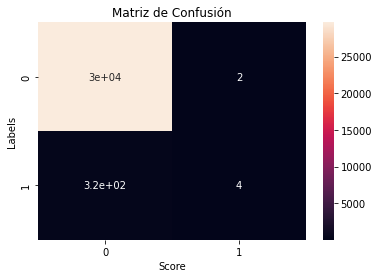

In [360]:
matrix = confusion_matrix(y_test, l_pred)
sns.heatmap(matrix, annot=True)
plt.ylabel('Labels')
plt.xlabel('Score')
plt.title('Matriz de Confusión')

report= classification_report(y_test, l_pred)
print(report)

Curva ROC:

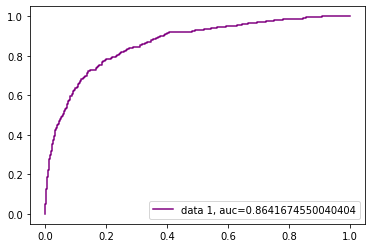

In [361]:
l_proba = log_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, l_proba)
auc = roc_auc_score(y_test, l_proba)
plt.plot(fpr, tpr, color='purple' ,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Aequitas:

In [362]:
from aequitas.group import Group
from aequitas.bias import Bias
from aequitas.fairness import Fairness
from aequitas.plotting import Plot # Group - matplotlib
import aequitas.plot as ap # Bias - altair

In [363]:
ae_log = pd.DataFrame()
ae_log['age_catscore'] = l_pred
ae_log['age_catlabel_value'] = y_test.values
ae_log['age_cat'] = x_test['customer_age'].values
ae_log['age_cat'] = ae_log['age_cat'].astype('str')
ae_log

,age_catscore,age_catlabel_value,age_cat
0,0,1,1.350370719259736
1,0,0,-1.1353706614385393
2,0,0,-1.1353706614385393
3,0,0,-0.3067902012057809
4,0,0,-0.3067902012057809
...,...,...,...
29995,0,0,-0.3067902012057809
29996,0,0,2.1789511794924943
29997,0,1,-0.3067902012057809
29998,0,0,-0.3067902012057809


In [364]:
ae_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age_catscore        30000 non-null  int64 
 1   age_catlabel_value  30000 non-null  int64 
 2   age_cat             30000 non-null  object
dtypes: int64(2), object(1)
memory usage: 703.2+ KB


Random Forest:

In [366]:
from sklearn.ensemble import RandomForestClassifier

In [367]:
forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_features='sqrt', bootstrap=True,
                                max_samples=1/3, oob_score=True)
forest.fit(x_train, y_train)
f_pred = forest.predict(x_test)
f_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [368]:
forest.oob_score_

0.9893142857142857

In [369]:
f_df =pd.DataFrame(f_pred, columns=['score'])
f_df1 = f_df[f_df['score'] == 1]
f_df0 = f_df[f_df['score'] == 0]
f_df0.count(), f_df1.count()

(score    30000
 dtype: int64,
 score    0
 dtype: int64)

Matriz de confusión:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     29681
           1       0.00      0.00      0.00       319

    accuracy                           0.99     30000
   macro avg       0.49      0.50      0.50     30000
weighted avg       0.98      0.99      0.98     30000



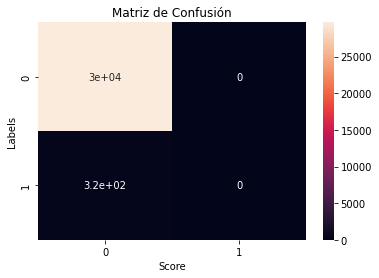

In [370]:
f_matrix = confusion_matrix(y_test, f_pred)
sns.heatmap(f_matrix, annot=True)
plt.ylabel('Labels')
plt.xlabel('Score')
plt.title('Matriz de Confusión')

f_report= classification_report(y_test, f_pred)
print(f_report)

Curva ROC:

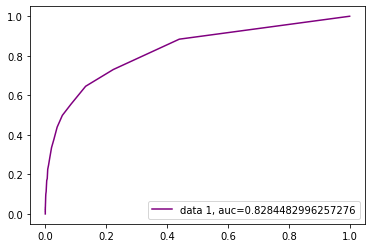

In [371]:
f_proba = forest.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, f_proba)
auc = roc_auc_score(y_test, f_proba)
plt.plot(fpr, tpr, color='purple', label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

### 5.  Si tuviese que elegir uno de los modelos que ha entrenado, ¿cuál elegiría y por qué? Justifique su respuesta. (1 pto.)

Entre los dos modelos que entrené la Regresión Logística es el único que entrega prediciones positivas, no como el Random Forest que sólo entrega prediciones negativas. Ambos presentan una curva ROC que dice que el modelo es relativamente bueno, pero como los datos de entrenamiento presentan una cantidad tan bajas de casos positivos, entonces los modelos siempren van a tender a fallar y no predecir valores positivos. En este caso, estos modelos no podrían predecir casos de fraude y a todos los catalogaría como "inocentes", por lo que el ninguno de los modelos es el óptimo para ser usado en la realidad.